In [1]:
import pandas as pd 
import numpy as np
from pylab import *



In [2]:
df=pd.read_csv("data/session1718.csv")

C:\Users\jochoi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

#plt.style.available
df.drop(['Unnamed: 0','Usr_id'],axis=1,inplace=True)


In [4]:


#df['acad_prog']=df['acad_prog'].fillna("staff")
#df['FT/PT']=df['FT/PT'].fillna("Not Applicable")
#df['Undergrad']=df['Undergrad'].fillna("Not Applicable")
df['user_id']=df['user_id'].astype(str)
df['Faculty'] = df['Faculty'].astype("category")
df['access_date']=df['access_date'].astype('datetime64[ns]')
df['on_or_off'] = df['on_or_off'].astype("category")
df['Undergrad'] = df['Undergrad'].astype("category")
df['PROGRAM_YEAR']=df['PROGRAM_YEAR'].astype('category')
df['acad_prog']=df['acad_prog'].astype('category')
df['domain']=df['domain'].astype('category')
df['url']=df['url'].astype('category')
df['FT/PT'] = df['FT/PT'].astype("category")
df.columns=['user_id','url','domain','on_or_off','access_date','total_per_session','prog_yr','FT/PT',"acad_prog","Undergrad/grad",'faculty']

In [5]:
df=df[df["faculty"]!="Other"]
df.dropna(subset=["faculty",'Undergrad/grad'],inplace=True)

Report date : August 29,2018

In [6]:
dfffilter=df.faculty.filter(like="Art",axis=0)
print(dfffilter)

type(dfffilter)
listx=["Arts","Business","Communication and Design","Community Services","Engineering and Architectural Sci","Science"]
#print(listx)


Series([], Name: faculty, dtype: category
Categories (7, object): [Arts, Business, Communication and Design, Community Services, Engineering and Architectural Sci, Science, Special])


In [8]:
#clean data
df1=df
df1=df1[df1['domain']!="67.199.146.239"]
df1=df1[df1['domain']!="google.com"]
df1=df1[df1['url']!="covers.ebrary.com"]
df1=df1[df1['domain']!="covers.utoronto.com"]
df1=df1[df1['url']!="media.proquest.com"]
df1=df1[df1['url']!="f1-na.readspeaker.com"]
df1=df1[df1['url']!="images.scholarsportal.info"]
df1.url=df1.domain.replace("journals2.scholarsportal.info","journals.scholarsportal.info")
df1.url=df1.domain.replace("journals1.scholarsportal.info","journals.scholarsportal.info")
df1.domain=df1.domain.replace("book1.scholarsportal.info","books.scholarsportal.info")
df1.domain=df1.domain.replace("book2.scholarsportal.info","books.scholarsportal.info")
df1.domain=df1.domain.replace("booksnow1.scholarsportal.info","booksnow.scholarsportal.info")
df1.domain=df1.domain.replace("booksnow2.scholarsportal.info","booksnow.scholarsportal.info")
df1.domain=df1.domain.replace("scholar.google.co.uk","scholar.google.ca")
df1.domain=df1.domain.replace("dc2.chass.utoronto.ca","dc.chass.utoronto.ca")
df1.domain=df1.domain.replace("dc1.chass.utoronto.ca","dc.chass.utoronto.ca")
df1.domain=df1.domain.replace("www120.statcan.gc.ca","statcan.ca")
df1.domain=df1.domain.replace("www150.statcan.gc.ca","statcan.ca")
df1.domain=df1.domain.replace("www5.statcan.gc.ca","statcan.ca")
df1.domain=df1.domain.replace("www23.statcan.gc.ca","statcan.ca")
df1.domain=df1.domain.replace("statcan.gc.ca","statcan.ca")




In [29]:

#df4

df4=pd.DataFrame(df1.groupby(['faculty','Undergrad/grad','acad_prog','FT/PT'])['user_id'].nunique())

df4.to_csv('tableau/df4.csv')
df4.head()     

user_id
faculty Undergrad/grad acad_prog                   FT/PT         
Arts    Grad           Geog or Spatial Analysis    PT           8
                       MA Literatures of Modernity FT          15
                       MA Philosophy               FT          26
                       MA Psychology               FT          55
                       MA Public Policy & Admin    FT          28

In [24]:
df3=pd.DataFrame(df1.groupby(["faculty","Undergrad/grad",'acad_prog'])['total_per_session'].count())
df3['Per user usage']=df1.groupby(['faculty',"Undergrad/grad",'acad_prog'])['user_id'].count()/df1.groupby(['faculty',"Undergrad/grad",'acad_prog'])['user_id'].nunique()
df3.to_csv('tableau/df3.csv')
df3.head()

total_per_session  \
faculty Undergrad/grad acad_prog                                        
Arts    Grad           Geog or Spatial Analysis                   710   
                       MA Literatures of Modernity               1579   
                       MA Philosophy                             5016   
                       MA Psychology                            33225   
                       MA Public Policy & Admin                  1340   

                                                    Per user usage  
faculty Undergrad/grad acad_prog                                    
Arts    Grad           Geog or Spatial Analysis          88.750000  
                       MA Literatures of Modernity      105.266667  
                       MA Philosophy                    192.923077  
                       MA Psychology                    604.090909  
                       MA Public Policy & Admin          47.857143

In [25]:
df5=pd.DataFrame(df1.groupby(['faculty','Undergrad/grad'])['user_id'].nunique())
df5.to_csv('tableau/df5.csv')
df5.head()

user_id
faculty                  Undergrad/grad         
Arts                     Grad                296
                         Undergrad          4646
Business                 Grad                445
                         Undergrad          8931
Communication and Design Grad                225

In [26]:
df2=pd.DataFrame(df1.groupby(['faculty',"domain"])['user_id'].count())

df2.to_csv('tableau/df2.csv')
df2.head()

user_id
faculty domain                                
Arts    18thcjournals.amdigital.co.uk       27
        aaajournals.org                      1
        aaapubs.org                          1
        aacnjournals.org                     4
        aadnc-aandc.gc.ca                    2

In [61]:

def report(df,reportlist):
    env = Environment(loader=FileSystemLoader('.'))
    template=env.get_template("templates/myreport.html")

    for f in reportlist:
      
        
        print("Faculty of " + f + " Profile " )
        print("*"*50)
        print("Academic Programs that were categorized as " + f + " include:")
        print("(listed with number of active users)")
        df2=pd.DataFrame(df1.groupby("domain")['user_id'].count())
        print("This includes")
        df4=df1.groupby(['Undergrad/grad','acad_prog','FT/PT'])['user_id'].nunique().unstack()
        df4=df4.reset_index()
        df4=pd.DataFrame(df4)
        
        df4ftsum=df4.FT.sum()
        
        df4ptsum=df4.PT.sum()
        
        print ("*"* 20 )
        
        df5=df1.groupby(['Undergrad/grad'])['user_id'].nunique()
        print(pd.DataFrame(df5))
        
        print ("*"* 40 )
        
        print(df4)
      
    
   
        #print(str(df4.Undergrad.sum())+ "Undergrad students")
        #print(str(df4.Grad.sum())+ "Grad students")
       
        print ("*"* 40 )
        
        
        df3=pd.DataFrame(df1.groupby(["Undergrad/grad",'acad_prog'])['total_per_session'].count())
        df3['Per user usage']=df1.groupby(["Undergrad/grad",'acad_prog'])['user_id'].count()/df1.groupby(["Undergrad/grad",'acad_prog'])['user_id'].nunique()
        print("Data about academic program (per user usage)")
        print(df3[df3['total_per_session']>0].sort_values(by="Per user usage",ascending=False))
        
        print ("*"* 40 )
        print("Top 20 Overall Databases for "+ f)
        Top20Dbdf=df2['user_id'].sort_values(ascending=False)[:20]
        print(Top20Dbdf)
    
        #plt.style.use("ggplot")
        #Top20Dbdf.plot(kind="barh")
        #plt.title("Top 20 Overall Databases for "+f)
        #plt.show()
    
        fig = plt.figure()
        plt.style.use("ggplot")
        Top20Dbdf.plot(kind="barh")
        plt.title("Top 20 Overall Databases for "+f)
        plt.draw()
        plt.savefig('../sample_outcome/report/plot'+f+'.png')
        
        plot1='../sample_outcome/report/plot'+f+'.png'
        
        template_vars = {"title" : "",
                 "f":f,
                #"df2":df2.to_html(),
                "df4ftsum":df4ftsum,
                "df4ptsum":df4ptsum,
                "df5":df5.to_html(),
                "df4":df4.to_html(),
                "df3":df3.to_html(),
                "Top20Dbdf":Top20Dbdf.to_html(),
                'plot1':plot1
                }
        
        html_out = template.render(template_vars)
        
        import sys
        
        file=open("../sample_outcome/report/report"+f+"20190315.html","w")
        file.write(html_out)
        file.close()
        #html_out.to_html("ezproxyA6A.html")
    
        #plt.style.use("ggplot")
        #Top20Dbdf.plot(kind="barh")
        #plt.title("Top 20 Overall Databases for "+f)
        #plt.show()
    


Faculty of Arts Profile 
**************************************************
Academic Programs that were categorized as Arts include:
(listed with number of active users)
This includes
4724.0 Full-time active users
218.0 Part-time active users
********************
                user_id
Undergrad/grad         
Grad                296
Undergrad          4646
****************************************
FT/PT Undergrad/grad                       acad_prog      FT     PT
0               Grad        Geog or Spatial Analysis     NaN    8.0
1               Grad     MA Literatures of Modernity    15.0    NaN
2               Grad                   MA Philosophy    26.0    NaN
3               Grad                   MA Psychology    55.0    NaN
4               Grad        MA Public Policy & Admin    28.0    NaN
5               Grad    MA Public Policy & Admin. PT     NaN   15.0
6               Grad            MSA Spatial Analysis    21.0    NaN
7               Grad                  PhD  Economics   

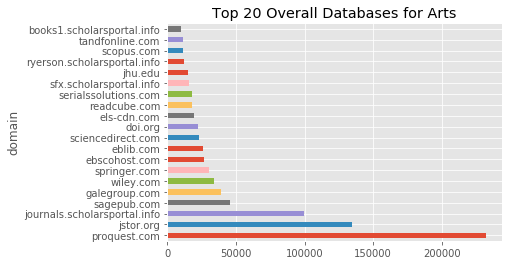

Faculty of Business Profile 
**************************************************
Academic Programs that were categorized as Business include:
(listed with number of active users)
This includes
8947.0 Full-time active users
429.0 Part-time active users
********************
                user_id
Undergrad/grad         
Grad                445
Undergrad          8931
****************************************
FT/PT Undergrad/grad                       acad_prog      FT     PT
0               Grad   Engr Innovation & Entreprnshp    29.0    2.0
1               Grad   Entrprs Info Protection PMDip     5.0    NaN
2               Grad           Envir. App.Sci.& Mgt.    50.0   12.0
3               Grad           Financial Mathematics   116.0    NaN
4               Grad       Int'l Economics & Fin. PT     NaN    6.0
5               Grad    MA Int'l Economics & Finance    16.0    NaN
6               Grad     MBA Business Administration    23.0    NaN
7               Grad  MBA Business Administrati

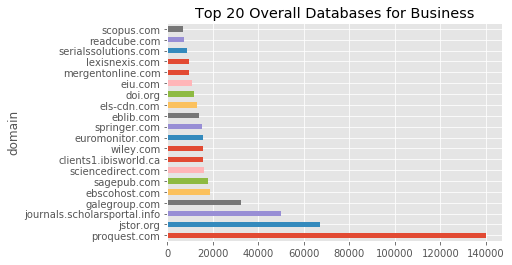

Faculty of Communication and Design Profile 
**************************************************
Academic Programs that were categorized as Communication and Design include:
(listed with number of active users)
This includes
5319.0 Full-time active users
7.0 Part-time active users
********************
                user_id
Undergrad/grad         
Grad                225
Undergrad          5101
****************************************
FT/PT Undergrad/grad                       acad_prog     FT   PT
0               Grad               Digital Media MDM   12.0  NaN
1               Grad      MA Communication & Culture   38.0  6.0
2               Grad                      MA Fashion   37.0  NaN
3               Grad  MA Film Photo Preserv Coll Mgt   38.0  NaN
4               Grad             MA Media Production    8.0  NaN
5               Grad           MFA Documentary Media   44.0  NaN
6               Grad          MPC Prof Communication   10.0  NaN
7               Grad     PhD Communicatio

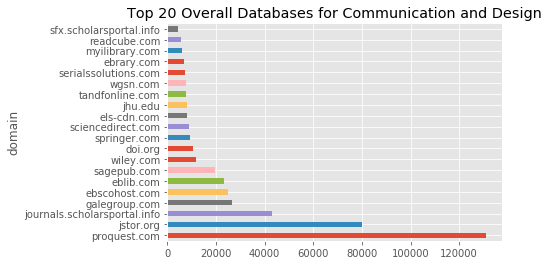

Faculty of Community Services Profile 
**************************************************
Academic Programs that were categorized as Community Services include:
(listed with number of active users)
This includes
6861.0 Full-time active users
1477.0 Part-time active users
********************
                user_id
Undergrad/grad         
Grad                468
Undergrad          7870
****************************************
FT/PT Undergrad/grad                       acad_prog     FT     PT
0               Grad              Dietetics PMDip FT    9.0    NaN
1               Grad         MA Child and Youth Care   14.0    4.0
2               Grad      MA Early Childhood Studies   21.0    NaN
3               Grad   MA Early Childhood Studies PT    NaN   16.0
4               Grad     MA Immigration & Settlement   27.0    8.0
5               Grad    MHSc Nutrition Communication   40.0    NaN
6               Grad           MPL Urban Development   72.0    NaN
7               Grad           Mas

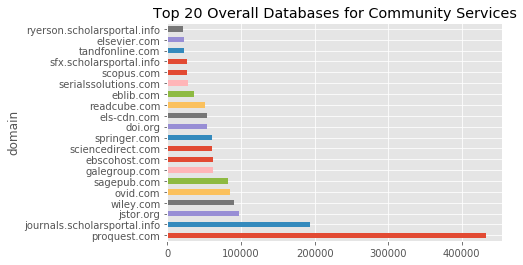

Faculty of Engineering and Architectural Sci Profile 
**************************************************
Academic Programs that were categorized as Engineering and Architectural Sci include:
(listed with number of active users)
This includes
4792.0 Full-time active users
73.0 Part-time active users
********************
                user_id
Undergrad/grad         
Grad                728
Undergrad          4137
****************************************
FT/PT Undergrad/grad                        acad_prog      FT    PT
0               Grad       MASC Aerospace Engineering    28.0   NaN
1               Grad            MASc Building Science    14.0   NaN
2               Grad        MASc Chemical Engineering    20.0   NaN
3               Grad           MASc Civil Engineering    35.0   NaN
4               Grad   MASc Electrical & Computer Eng    47.0   1.0
5               Grad    MASc Mech and Industrial Engr    31.0   NaN
6               Grad            MBSc Building Science    21.0   Na

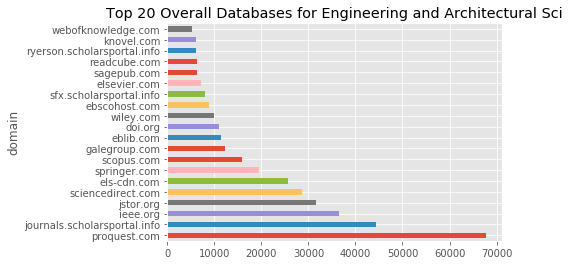

Faculty of Science Profile 
**************************************************
Academic Programs that were categorized as Science include:
(listed with number of active users)
This includes
2781.0 Full-time active users
59.0 Part-time active users
********************
                user_id
Undergrad/grad         
Grad                327
Undergrad          2513
****************************************
FT/PT Undergrad/grad                       acad_prog      FT    PT
0               Grad          MSc Biomedical Physics    29.0   NaN
1               Grad  MSc Data Science and Analytics    10.0  15.0
2               Grad           MSc Molecular Science    41.0   NaN
3               Grad                    MSc PhD Math    23.0   NaN
4               Grad  Master of Science Computer Sci    40.0   NaN
5               Grad     Master of Science in Mngmnt    57.0   NaN
6               Grad          PhD - Computer Science    27.0   NaN
7               Grad           PhD Molecular Science    20

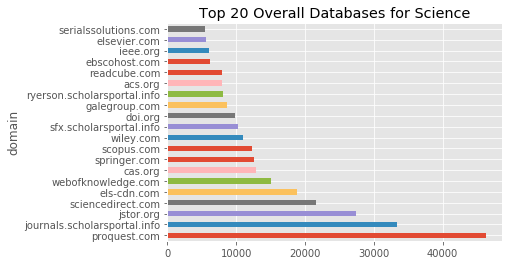

In [62]:
report(df,listx)